In [26]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Import CSV and map into DataFrame
twitchdata = pd.read_csv("twitchdata.csv")

In [28]:
# Seperating data into numerical columns and categorical columns
print(twitchdata.dtypes)
numeric_cols = twitchdata.select_dtypes(include=["int64"])
categorical_cols = twitchdata.select_dtypes(include=["object","bool"]).drop(columns = ["Channel"])

Channel                 object
Watch time(Minutes)      int64
Stream time(minutes)     int64
Peak viewers             int64
Average viewers          int64
Followers                int64
Followers gained         int64
Views gained             int64
Partnered                 bool
Mature                    bool
Language                object
dtype: object


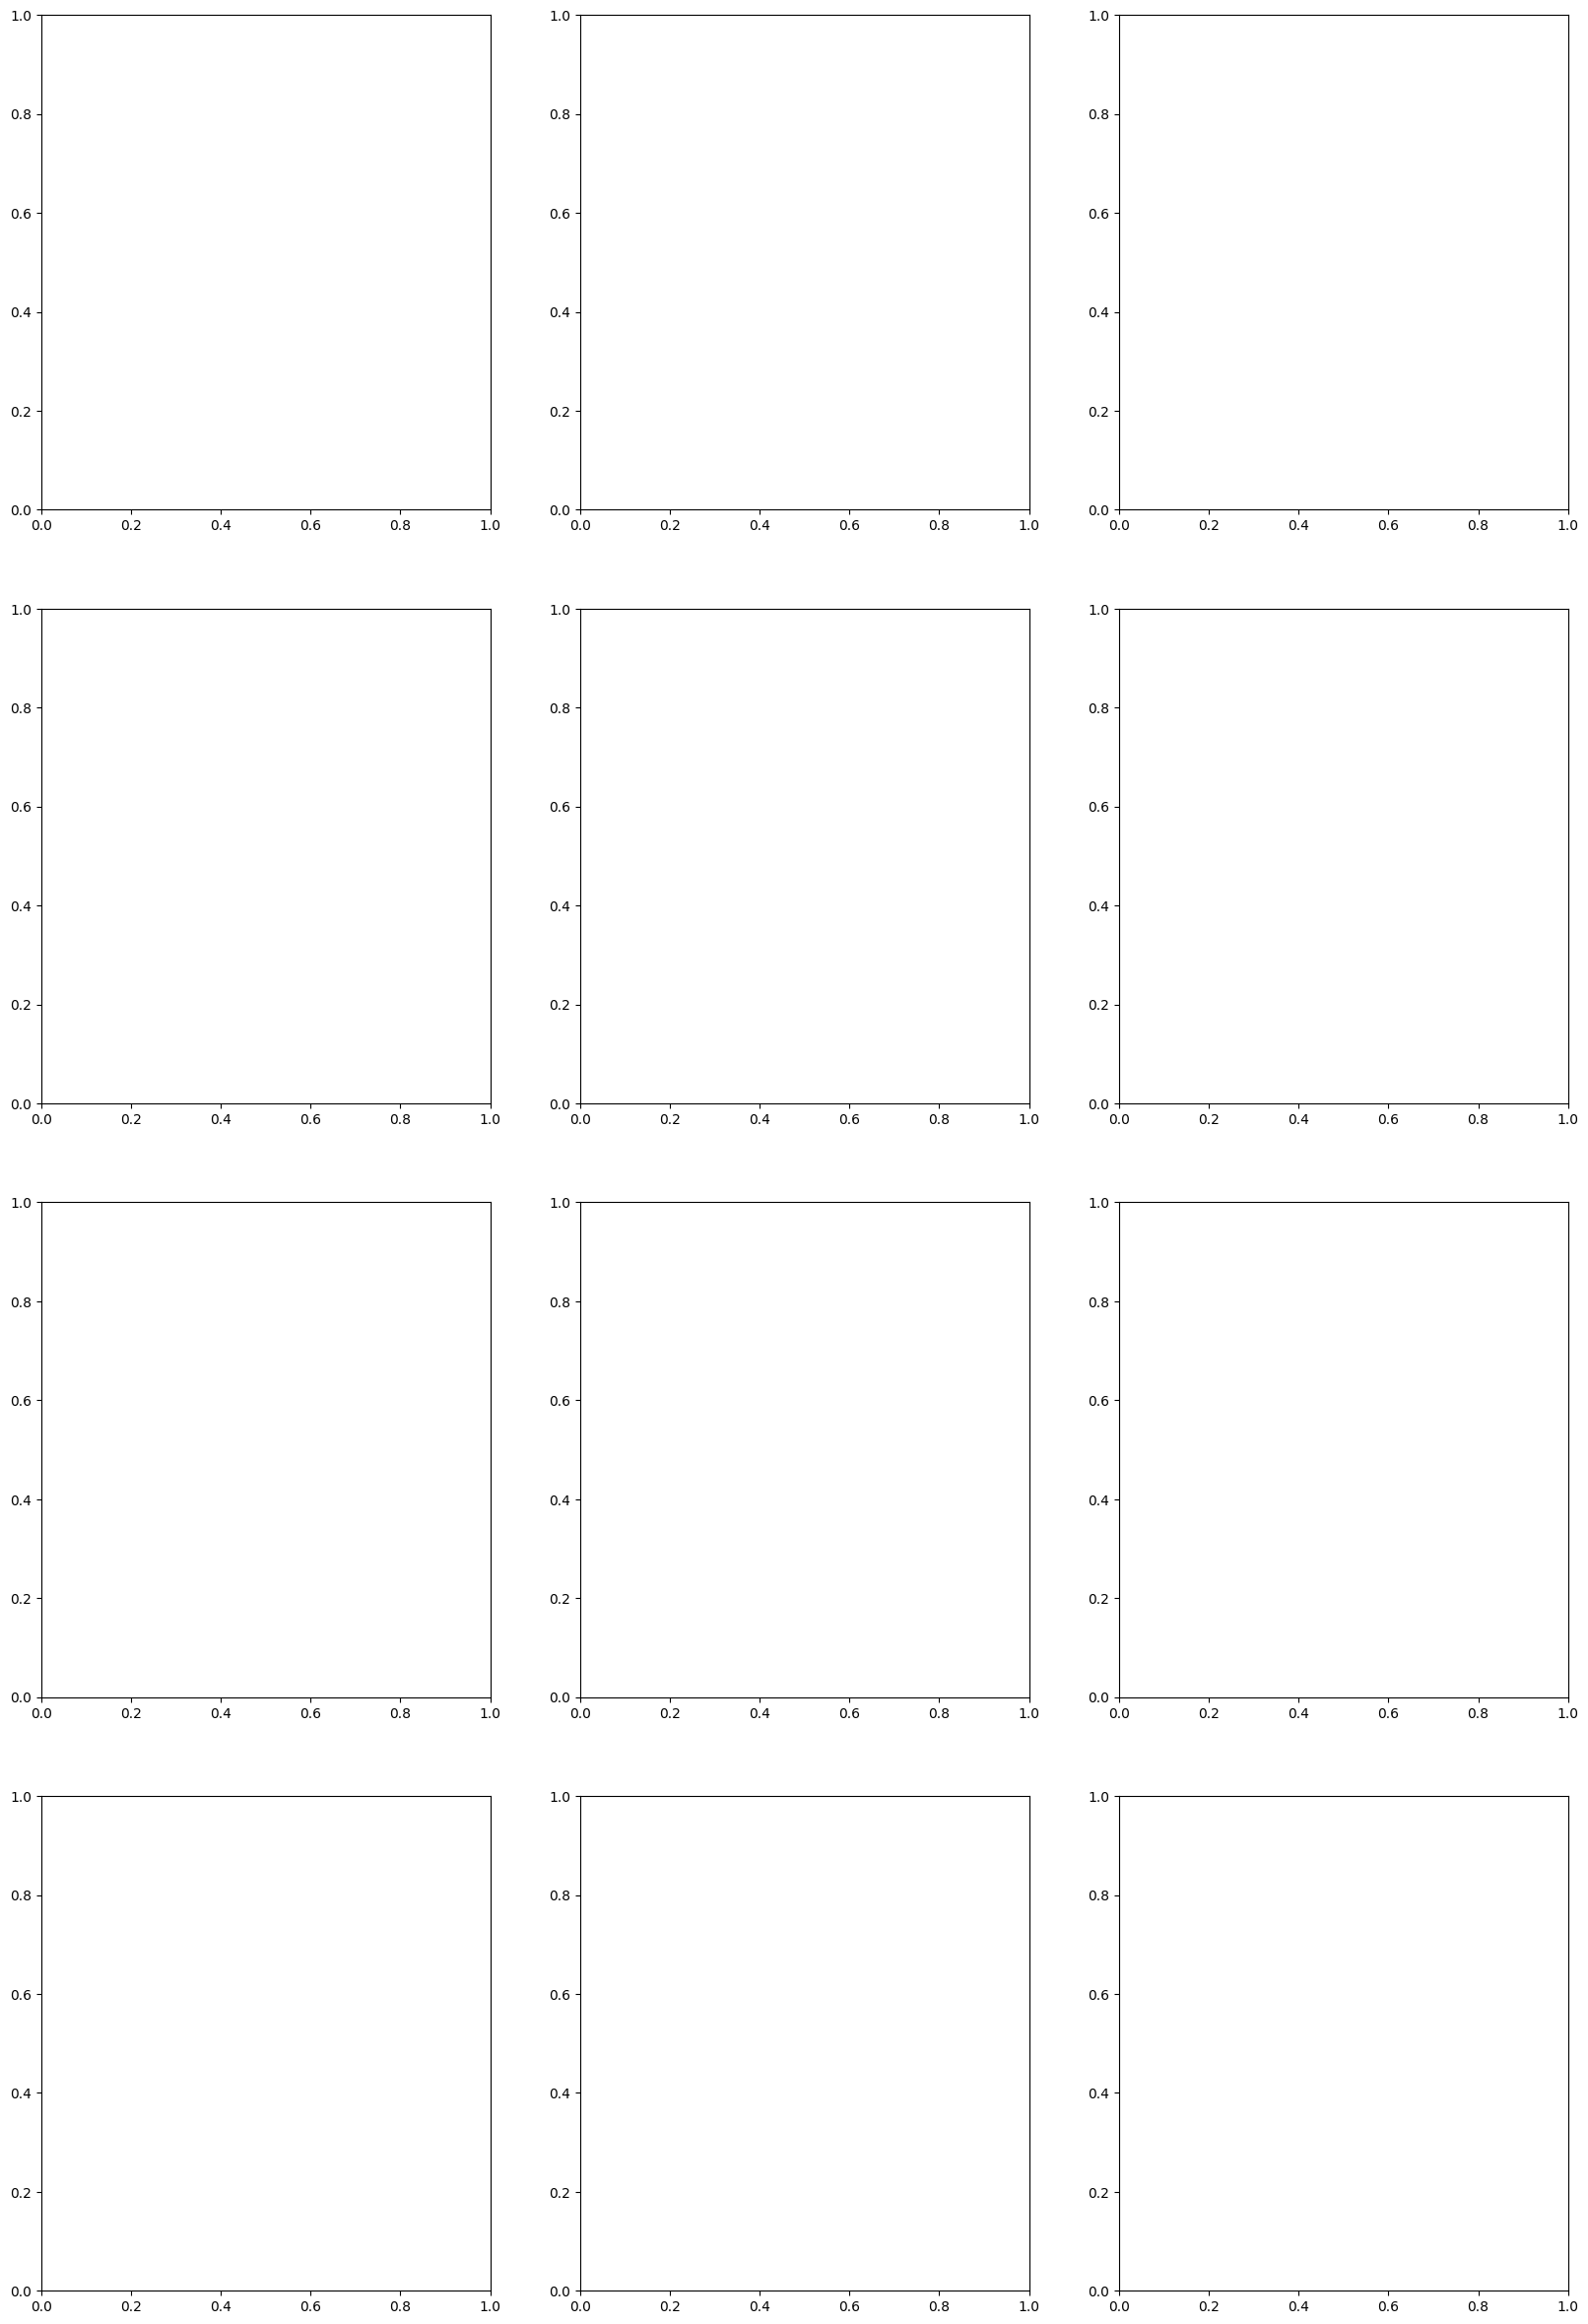

In [29]:
# Creating layout for graphs
total_plots = len(twitchdata.columns)
cols = 3
rows = (total_plots + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 30))
axes = axes.flatten()

In [30]:
# Inputting numerical graphs into layout
index = 0
for col in numeric_cols.columns:
    max_value = twitchdata[col].max()
    sns.histplot(twitchdata[col], kde=False, ax=axes[index])
    axes[index].set_title(f"Histogram of {col}")
    axes[index].set_xlabel(col)
    axes[index].set_ylabel("Count")
    axes[index].set_xlim(0, max_value)
    index += 1

In [31]:
# Inputting categorical graphs into layout
for col in categorical_cols.columns:
    sns.countplot(x=col, data=twitchdata, ax=axes[index])
    axes[index].set_title(f"Bar Chart of {col}")
    axes[index].set_xlabel(col)
    axes[index].set_ylabel("Count")
    plt.setp(axes[index].get_xticklabels(), rotation=90)
    index += 1

In [32]:
# Graphing min, 25th, median, 75th, and max of numerical data
sns.boxplot(data=numeric_cols, ax=axes[index])
axes[index].set_title("Box Plot of All Numerical Columns")
axes[index].set_xlabel("Columns")
axes[index].set_ylabel("Values")
plt.setp(axes[index].get_xticklabels(), rotation=90)

[None, None, None, None, None, None, None]

In [33]:
# Hiding unused graph
axes[11].set_visible(False)

Text(0.5, 0.98, 'Pairwise Scatter Plots of Numerical Columns')

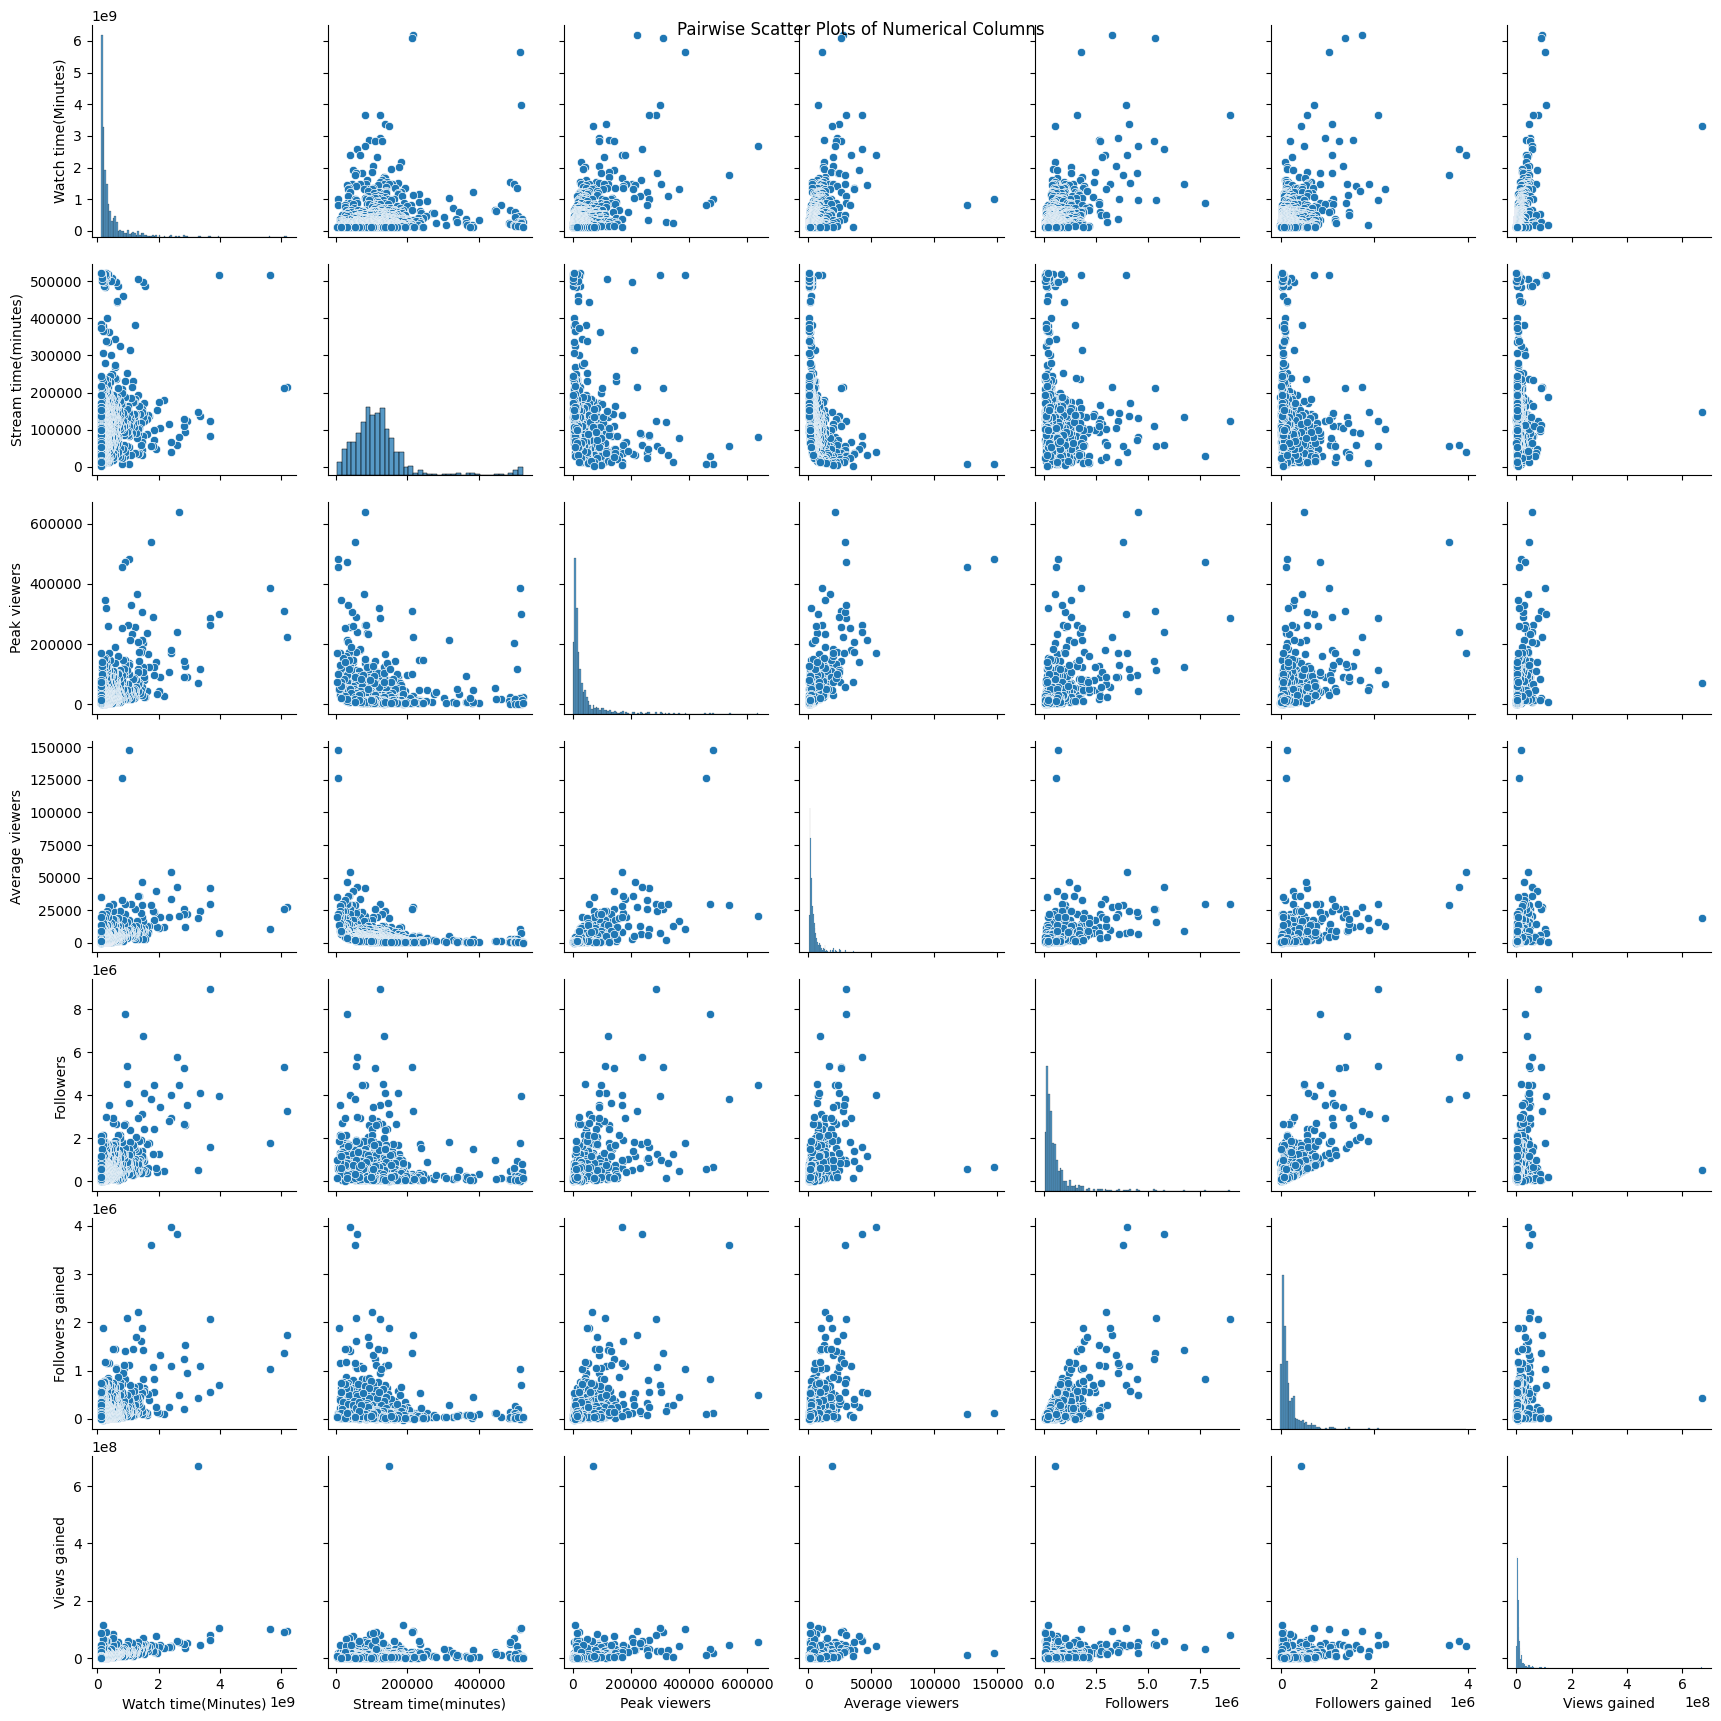

In [34]:
# Graphing pair-wise relationships of numerical data
sns.pairplot(twitchdata[numeric_cols.columns])
plt.suptitle("Pairwise Scatter Plots of Numerical Columns")

In [35]:
# Showing all graphs
plt.show()

In [36]:
# Answering questions in #4
print("To show categorical vs categorical data we use the pd.crosstab function on the two categories we want to observe, then create a heatmap on that crosstab.")
print('To show the relationship between categorical and numerical data we create any normal plot in seaborn, and then set the "hue" argument to the category we want to compare against.')

To show categorical vs categorical data we use the pd.crosstab function on the two categories we want to observe, then create a heatmap on that crosstab.
To show the relationship between categorical and numerical data we create any normal plot in seaborn, and then set the "hue" argument to the category we want to compare against.
